In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [2]:
with open("../Data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [3]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
191995,187,1314,BUG,SKELETON,7,15,999
191996,1438,1433,TAXI,TAPE,8,15,999
191997,1537,1489,UNDERWEAR,TOWEL,9,15,999
191998,386,283,COUCH,CHAUFFEUR,10,15,999


In [4]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
127995,947,NEUTRON,402,11,0,15,999
127996,467,DINER,1441,2,1,15,999
127997,1444,TEENAGER,1014,4,0,15,999
127998,1489,TOWEL,1537,9,1,15,999


### Run CMR-IA

In [5]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0,
    beta_cue = 0.5,
    beta_distract = 0,
    beta_rec_new = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  
    gamma_cf = 0.6,  # cf - fc Higher, ILI +1 Higher
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.01,
    c_thresh_ass = 0.01,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 5,  # this is important for increasing PLI num
    alpha = 1,
    phi_s = 0.5,
    phi_d = 0.5,
    nitems_in_accumulator = 48,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0,
 'beta_cue': 0.5,
 'beta_rec_new': 0.1,
 'beta_rec_post': 0.1,
 'beta_distract': 0,
 'phi_s': 0.5,
 'phi_d': 0.5,
 's_cf': 0.2,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.01,
 'd_ass': 0.8,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6}

In [7]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 504.3954048156738


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,823.0,1540.0,0.853390
1,0,0,1347,1051.0,1900.0,0.795772
2,0,0,413,524.0,1590.0,0.845273
3,0,0,812,879.0,1680.0,0.698832
4,0,0,110,679.0,2440.0,0.693047
...,...,...,...,...,...,...
127995,15,999,947,402.0,3550.0,0.831712
127996,15,999,467,-1.0,-1.0,-1.000000
127997,15,999,1444,-1.0,-1.0,-1.000000
127998,15,999,1489,1537.0,2400.0,0.854407


In [8]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,823.0,1540.0,0.853390,CLIPPERS,823,9,1,True
1,0,0,1347,1051.0,1900.0,0.795772,SPARROW,1051,8,1,True
2,0,0,413,524.0,1590.0,0.845273,CROSS,524,7,0,True
3,0,0,812,879.0,1680.0,0.698832,LEOPARD,1323,5,0,False
4,0,0,110,679.0,2440.0,0.693047,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3550.0,0.831712,NEUTRON,402,11,0,True
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False
127998,15,999,1489,1537.0,2400.0,0.854407,TOWEL,1537,9,1,True


In [9]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,823.0,1540.0,0.853390,CLIPPERS,823,9,1,True,0.0,9.0
1,0,0,1347,1051.0,1900.0,0.795772,SPARROW,1051,8,1,True,0.0,8.0
2,0,0,413,524.0,1590.0,0.845273,CROSS,524,7,0,True,0.0,7.0
3,0,0,812,879.0,1680.0,0.698832,LEOPARD,1323,5,0,False,0.0,6.0
4,0,0,110,679.0,2440.0,0.693047,BED,1083,0,0,False,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3550.0,0.831712,NEUTRON,402,11,0,True,15.0,11.0
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN
127998,15,999,1489,1537.0,2400.0,0.854407,TOWEL,1537,9,1,True,15.0,9.0


In [10]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,823.0,1540.0,0.853390,CLIPPERS,823,9,1,True,0.0,9.0,0.0,0.0,Correct
1,0,0,1347,1051.0,1900.0,0.795772,SPARROW,1051,8,1,True,0.0,8.0,0.0,0.0,Correct
2,0,0,413,524.0,1590.0,0.845273,CROSS,524,7,0,True,0.0,7.0,0.0,0.0,Correct
3,0,0,812,879.0,1680.0,0.698832,LEOPARD,1323,5,0,False,0.0,6.0,0.0,1.0,ILI
4,0,0,110,679.0,2440.0,0.693047,BED,1083,0,0,False,0.0,6.0,0.0,6.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3550.0,0.831712,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,1537.0,2400.0,0.854407,TOWEL,1537,9,1,True,15.0,9.0,0.0,0.0,Correct


In [11]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,2000.0,0.804827,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1534.0,2210.0,0.718781,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1690.0,0.823831,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1119.0,2990.0,0.458587,DUNE,1534,11,0,False,1.0,0.0,0.0,-11.0,ILI
12,1,0,844,396.0,1590.0,0.818990,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3550.0,0.831712,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,1537.0,2400.0,0.854407,TOWEL,1537,9,1,True,15.0,9.0,0.0,0.0,Correct


In [12]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,2000.0,0.804827,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1534.0,2210.0,0.718781,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1690.0,0.823831,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1119.0,2990.0,0.458587,DUNE,1534,11,0,False,1.0,0.0,0.0,-11.0,ILI
12,1,0,844,396.0,1590.0,0.818990,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
13,1,0,586,1446.0,2230.0,0.858640,FLY,1446,4,1,True,1.0,4.0,0.0,0.0,Correct
14,1,0,1093,35.0,1820.0,0.849473,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,456.0,1950.0,0.846187,GROUND,456,3,0,True,1.0,3.0,0.0,0.0,Correct
16,2,0,173,414.0,2690.0,0.886827,BRIDE,414,10,0,True,2.0,10.0,0.0,0.0,Correct
17,2,0,492,1636.0,2140.0,0.555615,DRAGON,845,11,0,False,2.0,1.0,0.0,-10.0,ILI


In [13]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    57062
ILI        40169
NoResp     20982
PLI         1787
Name: list, dtype: int64

In [14]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.47551666666666664

In [15]:
np.array(f_in).shape

(1000, 128, 384)

In [16]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [17]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [18]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [19]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLOT

In [20]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
# df_PLI = df_simu.query("intrusion_type == 'PLI'")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-14.0,5,14.0,0.003652
1,-13.0,3,13.0,0.002191
2,-12.0,11,12.0,0.008035
3,-11.0,13,11.0,0.009496
4,-10.0,29,10.0,0.021183
5,-9.0,29,9.0,0.021183
6,-8.0,44,8.0,0.032140
7,-7.0,63,7.0,0.046019
8,-6.0,92,6.0,0.067202
9,-5.0,94,5.0,0.068663


In [21]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
105,13,0,1200,966.0,4160.0,0.587133,ROBOT,461,11,1,False,4.0,1.0,-9.0,-10.0,PLI
238,13,1,1060,93.0,2370.0,0.557528,PICNIC,591,6,0,False,9.0,0.0,-4.0,-6.0,PLI
325,8,2,1576,1334.0,3190.0,0.542154,VOLLEYBALL,14,8,1,False,7.0,0.0,-1.0,-8.0,PLI
333,9,2,1220,785.0,4950.0,0.608304,SACK,300,6,0,False,8.0,2.0,-1.0,-4.0,PLI
366,13,2,219,1329.0,2460.0,0.560538,CAKE,501,6,0,False,11.0,0.0,-2.0,-6.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127836,11,998,122,1103.0,3490.0,0.512738,BERRY,557,9,1,False,8.0,0.0,-3.0,-9.0,PLI
127845,12,998,995,73.0,1870.0,0.546165,OYSTER,994,4,1,False,1.0,0.0,-11.0,-4.0,PLI
127929,7,999,1516,657.0,2610.0,0.631860,TUBE,914,4,1,False,6.0,1.0,-1.0,-3.0,PLI
127931,7,999,496,1256.0,3040.0,0.590931,DRESSER,212,6,1,False,6.0,1.0,-1.0,-5.0,PLI


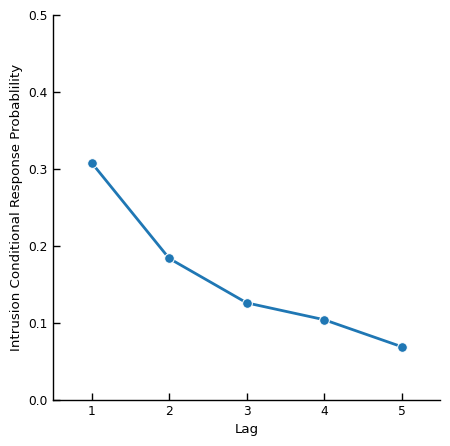

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_PLI.pdf')
plt.show()

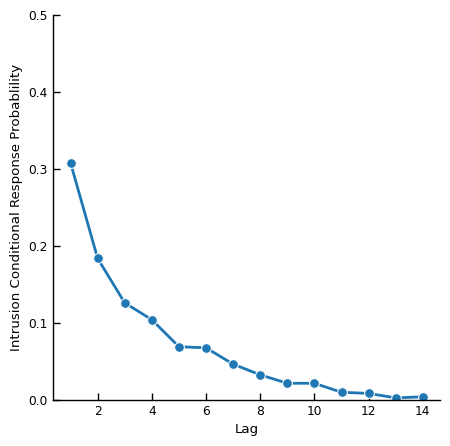

In [23]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp, x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
# plt.xlim([0.5,5.5])
# plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

In [24]:
df_ILI = df_simu.loc[df_simu.intrusion_type == 'ILI']
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,2000.0,0.804827,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1534.0,2210.0,0.718781,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1690.0,0.823831,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1119.0,2990.0,0.458587,DUNE,1534,11,0,False,1.0,0.0,0.0,-11.0,ILI
17,2,0,492,1636.0,2140.0,0.555615,DRAGON,845,11,0,False,2.0,1.0,0.0,-10.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127968,12,999,316,851.0,3880.0,0.805052,CLAMP,108,4,0,False,12.0,11.0,0.0,7.0,ILI
127980,13,999,70,1285.0,2100.0,0.607847,BAIT,1085,6,0,False,13.0,0.0,0.0,-6.0,ILI
127981,13,999,393,1430.0,4240.0,0.710395,COW,171,4,1,False,13.0,2.0,0.0,-2.0,ILI
127984,14,999,136,480.0,2240.0,0.640965,BLENDER,527,7,0,False,14.0,0.0,0.0,-7.0,ILI


In [25]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1    -1.752941
2    -2.102535
3    -2.130887
4    -2.055591
5    -2.190963
6    -2.220101
7    -2.157223
8    -2.156086
9    -2.169603
10   -2.187682
11   -2.232004
12   -2.168709
13   -2.204524
14   -2.236605
15   -2.276014
Name: pos_lag, dtype: float64

In [26]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt').reset_index()
# df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
ILI_num = df_ILI.shape[0]
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / ILI_num
df_ILIgp

,pos_lag,ILI_cnt,ILI_prob
0,-11.0,905,0.022530
1,-10.0,1326,0.033011
2,-9.0,1535,0.038214
3,-8.0,1822,0.045358
4,-7.0,1961,0.048819
5,-6.0,2039,0.050761
6,-5.0,2303,0.057333
7,-4.0,2561,0.063756
8,-3.0,3071,0.076452
9,-2.0,3689,0.091837


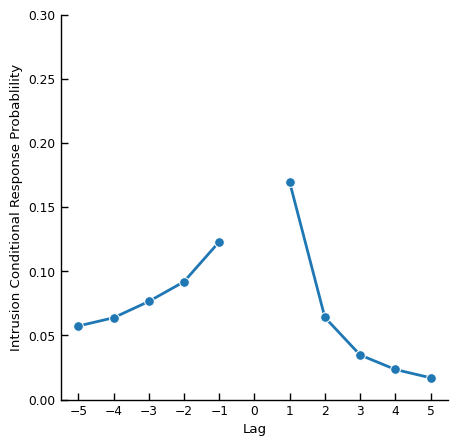

In [29]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_ILI.pdf')
plt.show()